### PCA Analysis on Smart Building Data

In [1]:
import pandas as pd
import numpy as np

from sklearn.decomposition import PCA

import matplotlib.pyplot as plt

import seaborn as sns

import sklearn as sk
import matplotlib.pyplot as plt
%pylab inline
%matplotlib inline

from sensor_data_analysis_api import *

Populating the interactive namespace from numpy and matplotlib


In [2]:
print 'pandas version: ',pd.__version__
print 'numpy version:',np.__version__
print 'sklearn version:',sk.__version__
pd.set_option("display.max_rows",10)

import warnings
warnings.filterwarnings("ignore")

pandas version:  0.19.2
numpy version: 1.11.3
sklearn version: 0.18.1


### Use Function to load Signals for a particular room 

##### Function Signature
get_signal_dataframe(room, signals = None, mean_type="hour", use_weather_data=True)

signals = None               --   All Signals

mean_type = quarter_hour     --   Aggregated at every 15 minute interval

use_weather_data = false     --   Use and Merge Weather Data

In [3]:
room = 'Rm-4226'
signals = ["Zone Temperature", 'Supply Airflow']

dataDF = get_signal_dataframe(room, signals = None, mean_type="quarter_hour" , use_weather_data=False)



# Check if we  have any NaNs  in the data. Replacing NaNs with 0
#X.isnull().values.any()

df_temp = dataDF
df_temp.fillna(method='bfill', inplace = True)
room_signals = df_temp


Read file:  506_0_3001981.csv
Read file:  506_0_3001987.csv
Read file:  506_0_3001985.csv
Read file:  506_0_3001984.csv
Read file:  506_0_3001986.csv
Read file:  506_1_3001989.csv
Read file:  506_1_3015755.csv
Read file:  506_1_3001991.csv
Read file:  506_1_3001988.csv
Read file:  506_1_3001994.csv
Read file:  506_1_3001993.csv
Read file:  506_1_3001996.csv
Read file:  506_1_3001990.csv
Read file:  506_1_3001992.csv
Read file:  506_1_3001995.csv
Read file:  506_14_3001999.csv


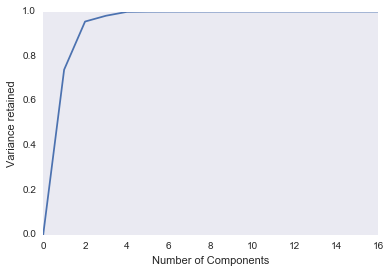

In [10]:
X = room_signals.iloc[:,2:].values

pca_signals=PCA()
X_proj = pca_signals.fit_transform(X)

pca_signals = PCA().fit(X) 
evr = [0]+list(pca_signals.explained_variance_ratio_)
cumulative_explained = np.cumsum(evr) 
plt.plot(cumulative_explained);
plt.xlabel('Number of Components') 
plt.ylabel('Variance retained') 
plt.ylim(0,1) 
plt.grid()
plt.show()

### Considering 4 eigen Vectors as we are getting 95% of the data retained.

In [15]:
# Perform the PCA with number of compoments (n_comp) = 4
# use fit to calculate eigen vectors.

n_comp = 7

pca_with_n_eigen_vectors_signals = PCA(n_components = n_comp).fit(X) 
evr = [0]+list(pca_with_n_eigen_vectors_signals.explained_variance_ratio_)

### Transform the current data to new vector space.
signals_data_new_basis = pca_with_n_eigen_vectors_signals.transform(X)   


### Transform back the data from new space to original space
### Complete data is not recovered because we dropped few components which will throw away he data.

In [17]:
signals_data_orig_basis = pca_with_n_eigen_vectors_signals.inverse_transform(signals_data_new_basis)
df_new_room_signals = pd.DataFrame(signals_data_orig_basis)
df_result = pd.concat([room_signals.iloc[:,0:2], df_new_room_signals], axis=1)
df_result.columns = list(room_signals.columns)

### Plotting Original vs Projected

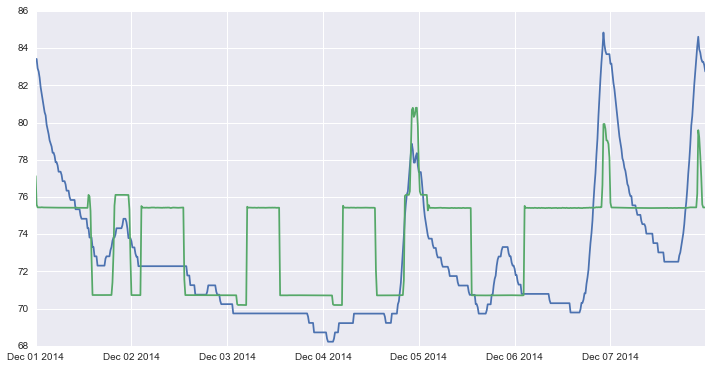

In [18]:
start_date="2014-12-01"
end_date="2014-12-07"

start = pd.to_datetime(start_date, format='%Y%m%d', infer_datetime_format=True)
end = pd.to_datetime(end_date, format='%Y%m%d', infer_datetime_format=True)

room_signals.time = pd.to_datetime(room_signals.time)
df = room_signals[(room_signals.time.dt.date>=start.date())&(room_signals.time.dt.date<=end.date())]
fig = plt.figure(figsize=(12, 6))
plt.plot(df["time"],df["Zone Temperature"] )

df_result.time = pd.to_datetime(df_result.time)
df2 = df_result[(df_result.time.dt.date>=start.date())&(df_result.time.dt.date<=end.date())]

plt.plot(df2["time"],df2["Zone Temperature"] )